**Truthfullness of Fandango movie rating website.**

Context: In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). 

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

The goal of this project is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np

fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_prev = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

After reading the README.md files of the two repositories, we found that the 2015 dataset is not randomly sampled. 

"fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015."

for the 2017/18 dataset, it says

"The movie must have been released in 2016 or later."
"The movie must have had a considerable number of votes and reviews "

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

**changing the goal of our analysis**

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

With the new goal, we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.
The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

In [3]:
fandango_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
sum(fandango_prev["Fandango_votes"] < 30)

0

When we checking the fandango_prev dataset, there are zero movie that has votes less than 30.

Now let's checking on the fandango_after dataset. Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [5]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

Movie	Fan ratings
Mechanic: Resurrection	2247
Warcraft	7271
Max Steel	493
Me Before You	5263
Fantastic Beasts and Where to Find Them	13400
Cell	17
Genius	127
Sully	11877
A Hologram for the King	500
Captain America: Civil War	35057

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

In [6]:
movie_2015 = fandango_prev[fandango_prev['FILM'].str.contains("2015")]

In [7]:
movie_2016 = fandango_after[fandango_after['year'] == 2016]

Our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. So we isolated the data from each dataset according to their production year. 

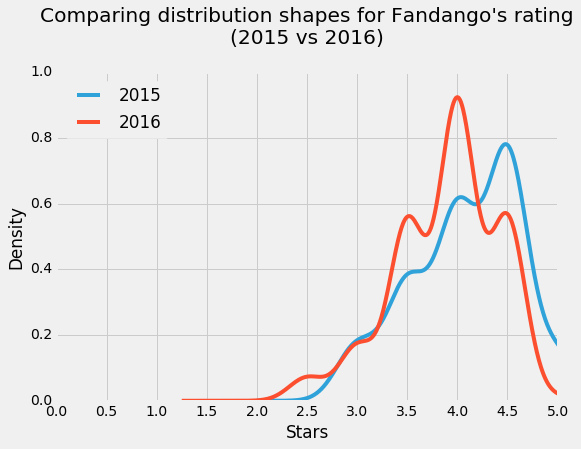

In [8]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

movie_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
movie_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's rating\n(2015 vs 2016)",
         y = 1.07)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

In [9]:
print('2015' + '\n' + '-' *16)

movie_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() *100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [10]:
print('2016' + '\n' + '-' *16)

movie_2016['fandango'].value_counts(normalize = True).sort_index() *100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

In [11]:
mean_2015 = movie_2015['Fandango_Stars'].mean()
mean_2016 = movie_2016['fandango'].mean()

median_2015 = movie_2015['Fandango_Stars'].median()
median_2016 = movie_2016['fandango'].median()

mode_2015 = movie_2015['Fandango_Stars'].mode()[0]
mode_2016 = movie_2016['fandango'].mode()[0]

In [12]:
summary = pd.DataFrame()
summary['2015'] = (mean_2015, median_2015, mode_2015)
summary['2016'] = (mean_2016, median_2016, mode_2016)
summary.index = ['mean', 'median', 'mode']
print(summary)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


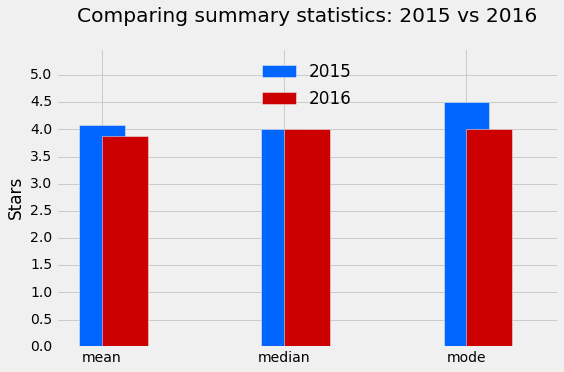

In [19]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [20]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

**conclusion**
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.